In [1]:
from astropy import constants as const
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind',10)
sns.set_context('notebook')
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20) 

In [2]:
h18 = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyu18.csv')

In [3]:
a2 = pd.read_csv('/home/oliver/PhD/Catalogues/APOKASC-2/APOKASC2_Table5.txt',sep='\t')
a2.rename(columns={'KIC':'KICID',
                   'Teff':'A_Teff',
                   'S Teff':'A_Teff_err',
                   'Nmax':'A_numax',
                   'S Nmax':'A_numax_err',
                   'Dnu':'A_dnu',
                   'S Dnu':'A_dnu_err',
                   'Fdnu':'A_fdnu',
                   'S Fdnu':'A_fdnu_err'}, inplace=True)

In [4]:
df = pd.merge(h18, a2, on='KICID', how='left')
columns=['KICID','numax', 'numax_err', 'dnu', 'dnu_err','Teff','Teff_err','ra','dec','parallax','parallax_error',
        'GAIAmag','Ag','e_GAIAmag','Kmag','e_Kmag','ccd','b17','Ebv','Aks','Z','A_Teff','A_Teff_err',
        'A_numax','A_numax_err','A_dnu','A_dnu_err','A_fdnu','A_fdnu_err','[Fe/H]']
df = df[columns].dropna().reset_index(drop=True)
df.drop(df[df.A_Teff == '...'].index.values, inplace=True)

In [6]:
df['A_numax'] = df.A_numax.astype(float)
df['A_numax_err'] = df.A_numax_err.astype(float)
df['A_dnu'] = df.A_dnu.astype(float)
df['A_dnu_err'] = df.A_dnu_err.astype(float)

In [7]:
df['A_Teff'] = df.A_Teff.astype(float)
df['A_Teff_err'] = df.A_Teff_err.astype(float)

In [8]:
df.to_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyuxapokasc2.csv',index=False)

## Lets do some quick comparisons for these stars to the Yu values

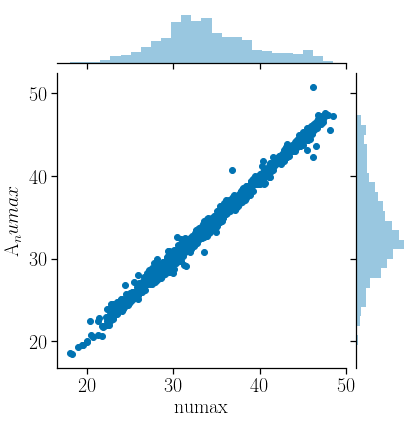

In [9]:
sns.jointplot(df.numax, df.A_numax)
plt.show()

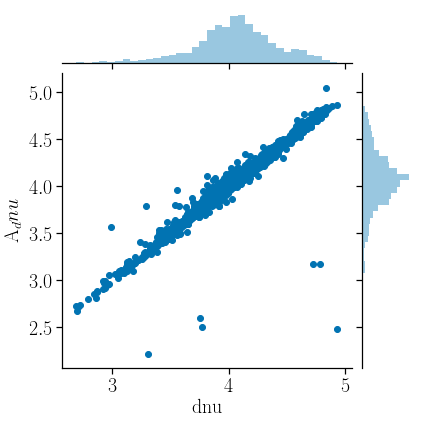

In [10]:
sns.jointplot(df.dnu, df.A_dnu)
plt.show()

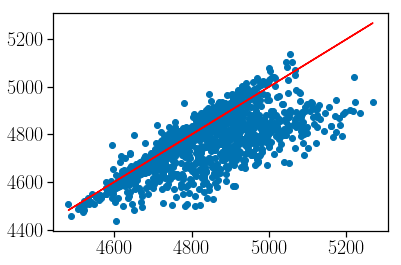

In [11]:
plt.scatter(df.Teff, df.A_Teff)
plt.plot(df.Teff, df.Teff,c='r')
plt.show()

In [12]:
len(df)

1654